# <center>Metody Numeryczne – Projekt 1</center>

### <center>Wskaźnik giełdowy MACD - sprawozdanie</center>
### <center>Agnieszka Delmaczyńska 184592</center>
<center>Informatyka, semestr 4, grupa 1</center>

### 1. Opis realizowanego zagadnienia

W ramach pierwszego projektu należało zaimplementować wskaźnik giełdowy **MACD** (*moving average convergence/divergence*) - jeden z najpopularniejszych wskaźników analizy technicznej.
Wskaźnik ten sugeruje nam momenty kupna i sprzedaży akcji. Jednak te sygnały często są spóźnione, przez co MACD nie jest tak efektywny - co wykażę w poniższej implementcaji. Wskaźnik ten może okazać się przydatny dla inwestycji długoterminowych.

Żeby zaimplementować wskaźnik MACD, należy zaimplementować wykładniczą średnią kroczącą (*exponential moving average*). Jest to odmiana średniej ważonej, w której znaczenie coraz
bardziej odległych w czasie próbek (wartości, cen akcji) maleje w sposób wykładniczy. EMA obliczamy wzorem:

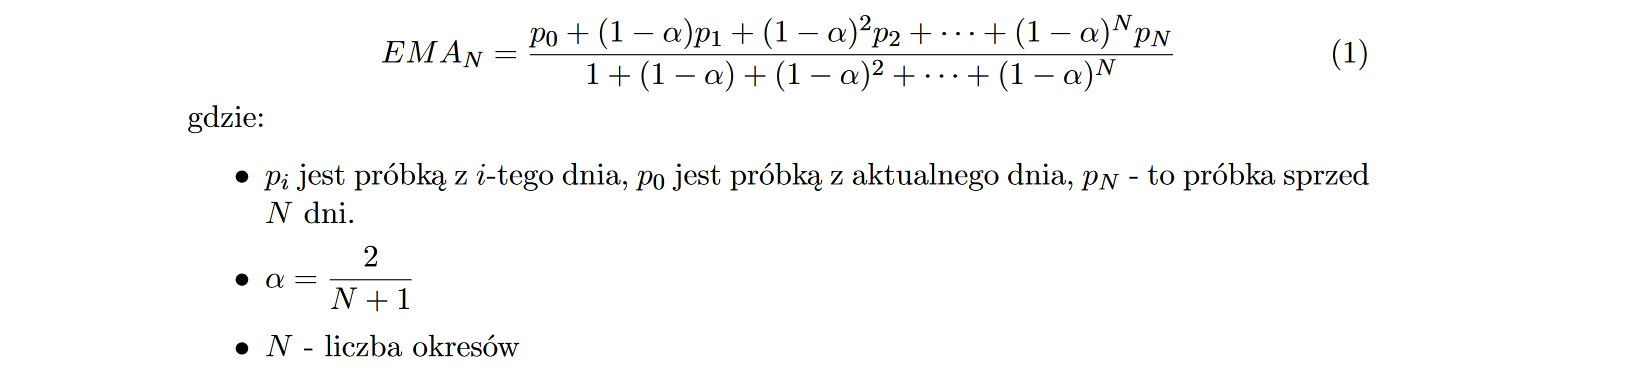

Wskaźnik MACD składa się z dwóch wykresów: MACD i SIGNAL. Miejsca przecięć MACD i SIGNAL sygnalizują moment do działania - zakupu lub sprzedaży.
* Miejsce, w którym MACD przecina SIGNAL **od dołu** jest sygnałem do **zakupu** akcji.
* Miejsce, w którym MACD przecina SIGNAL **od góry**, jest sygnałem do **sprzedaży** akcji.

Schemat implementacji tego zadania jest następujący:

1. Obliczamy dwie średnie kroczące EMA_26 i EMA_12
2. Na ich podstawie obliczamy MACD = EMA_12 - EMA_26
3. Wyznaczamy SIGNAL = EMA_9 od MACD
4. Następnie wyznaczamy miejsca przecięć MACD i SIGNAL

### 2. Implementacja

Do testowania wskaźnika MACD używałam danych wejściowych o długości 1000 w formacie .csv.
Posłużyłam się historycznymi danymi firmy LPP z WIG20 z finance.yahoo. Wybrałam język Python.

* Do wczytywania danych w formacie .csv użyłam biblioteki `pandas`.
* Żeby poprawnie wyświetlić daty na wykresach użyłam biblioteki `numpy`.
* Wyświetlenie wykresów realizuję przy użyciu biblioteki `matplotlib`.

Żeby wykresy były w darkmode, używam `plt.style.use('dark_background')`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

Następnie implementuję funkcję `ema()`, żeby później móc z niej skorzystać przy obliczaniu MACD i SIGNAL. Będzie ona dostawała jako parametr listę (data) od wczytanych danych z pliku i liczbę próbek (N), na bazie której będą dokonywane obliczenia. Wiem, że w języku Python nie trzeba podawać typów parametrów, jednak zdecydowałam się je podawać dla lapszej czytelności kodu i klarownego pokazania typu, jaki chcę użyć w danym momencie, żeby zapobiec błędom.

Na początku tworzę nową listę, która sumarycznie zostanie zwrócona przez funkcję. Następnie robię pętlę `for` po wszystkich rzędach wczytanych w pliku. Żeby obliczyć EMA, wykorzystuję wzór podany w instrukcji. Przyjmuję `alpha = 2/(N+1)` i `base = 1 - alpha` jako czynnik, który jest używany we wzorze w mianowniku i liczniku za każdym razem w odpowiedniej potędze.
Początkowo licznik i mianownik ustawiam na 0.0, w formacie float. Następnie dokonuję obliczeń od 0 do N+1, ponieważ liczba czynników w liczniku i miannowniku jest równa N. Za każdym wykonaniem pętli dodaję nowy element do listy, a na końcu ją zwracam.

In [2]:
# wykładnicza średnia krocząca
def ema(data: [float], N: int):
    new_list = []
    for current_sample in range(len(data)):
        alpha = 2/(N+1)
        base = 1 - alpha
        licznik = float(0.0)
        mianownik = float(0.0)
        for i in range(N+1):
            if current_sample - i >= 0:
                licznik += pow(base, i) * data[current_sample-i]
                mianownik += pow(base, i)
        new_list.append(licznik/mianownik)
    return new_list

Kolejnym krokiem est implementacja funkcji `macd()` obliczającej MACD. Funkcja ta również operuje na liście, podanej jako parametr. Wewnątrz jej tworzę pustą listę `macd_list[]`. Następnie tworzę listy `EMA12_list` `EMA26_list` używając wyżej zaimplementowanej funkcji `ema()`. W pętli `for` po wrzystkich elementach danej jako parametr listy obliczam macd i dodaję je do `macd_list` używając fukcji `append()` do dołączania nowych elementów do listy.
W rezultacie zwracana jest lista `macd_list`, na podstawie której będzie można obliczać SIGNAL.

In [3]:
def macd(data: [float]):
    macd_list = []
    EMA12_list = ema(data, 12)
    EMA26_list = ema(data, 26)
    for i in range(len(data)):
        macd_list.append(EMA12_list[i] - EMA26_list[i])
    return macd_list

Kolejnym krokiem w postępowaniu jest stworzenie funkcji `signal`, która obliczy nam wartości SIGNAL od MACD. Na wejściu Dostaje ona MACD. Wykorzystuje wcześniej dodaną funkcję `ema()` od liczby próbek `N == 9`. Zwraca listę, która zostanie użyta między innymi do stworzenia wykresów.

In [ ]:
def signal(MACD):
    return ema(MACD, 9)

Stworzyłam dodatkowo funkcję `histogram()`, której ostatecznie nie użyłam. Planowałam do wykresu trzeciego dodać jeszcze histogram, ale rozmyśliłam się z tego pomysłu, ponieważ nie był on potrzebny. Zamieszczę jednak tę funkcję w celach poglądowych. Jako parametr przyjmuje listę i  listę również zwróci. Na początku tworzona jest pusta lista, do której dodawane będą systematycznie w pętli elementy. Tworzymy również tablicę która zawiera listę linii sygnału. Aby obliczyc wartości histogramu (dodatnie lub ujemne), musimy obliczyć każdorazowo różnicę `temp_MACDSignalLine[i] - MACD[i]` dla każdego indeksu `i` w `data`.

In [ ]:
def histogram(data: [float]):
    histogram_list = []
    temp_MACD_signal_line = ema(MACD, 9)
    for i in range(len(data)):
        histogram_list.append(temp_MACD_signal_line[i] - MACD[i])
    return histogram_list

Następnie przechodzimy do funkcji `'__main__'`. Wczytujemy najpierw dane z pliku .csv do zmiennej `plik` używając funkcji `read_csv()`. Przyjmuje ona plik `LPP.WA.csv` i "wyciąga" z niego kolumny o nazwach `'Date', 'Close', 'Open'`. Używając funkcji `cloumns()` dostajemy kolumny z naszej DataFrame `plik`. W kolejnych trzech liniach tworzymy z kolumn listy odpowiednio Date, Close i Open, na podstawie których będziemy wykonywać obliczenia. Printuję tablicę, żeby zwizualizować dane

In [38]:
if __name__ == '__main__':

    plik = pd.read_csv('LPP.WA.csv', usecols=['Date', 'Close', 'Open'])
    plik.columns = [f"{column}" for column in plik.columns]
    Date = list(plik.loc[:, "Date"])
    Close = list(plik.loc[:, "Close"])
    Open = list(plik.loc[:, "Open"])
    print(plik)

            Date         Open        Close
0     2017-03-27  6453.049805  6677.549805
1     2017-03-28  6650.000000  6699.000000
2     2017-03-29  6612.049805  6574.950195
3     2017-03-30  6616.899902  6748.000000
4     2017-03-31  6640.000000  6794.850098
...          ...          ...          ...
996   2021-01-25  7865.000000  7750.000000
997   2021-01-26  7750.000000  7730.000000
998   2021-01-27  7575.000000  7530.000000
999   2021-01-28  7680.000000  7600.000000
1000  2021-01-29  7655.000000  7690.000000

[1001 rows x 3 columns]


Teraz pora na pierwszy wykres danych wejściowych: **Wykres cen akcji firmy LPP od daty**.
Tworzę wykresy używając biblioteki `matplotlib` jako `plt`. Wykres tworzę używając funkcji `figure()`. Jako, że jest to pierwszy wykres, funkcja zostaje wywołana od parametru == 1, określam również rozmiar wyświetlanego wykresu, aby odpowiednio go rozciągnąć na ekranie i zaprezentować dane. Funkcją `axes()` dodaję osie do bieżącej figury i ustawiam je jako bieżące osie. Stosuję funkcję `grid(True)` do wyświetlania pomocniczych linii siatki dla zwiększenia czytelności wykresu. Następnie robię `plot(Date, Close)`, czyli już ostatecznie wyświetlam wykres od danych wziętych z list `Date` i `Close`, stworzonych z danych z pliku .csv. Wyświetlam legendę funkcją `legend()` i za pomocą funkcji `xticks()` wyświetlam odpowiednie odstępy między datami na osi x. Jeśli takiego formatu by nie było, to wyświetliłyby się wszystkie dane wczytane z listy `Date` nałożone na siebie, zupełnie uniemożliwiające jakąkolwiek czytelność oznaczeń. Dodaję tytuły osi i wykresu używając `xlabel()`, `ylabel()` i `title()`. Na końcu wyświetlam wykres funkcją `show()`.

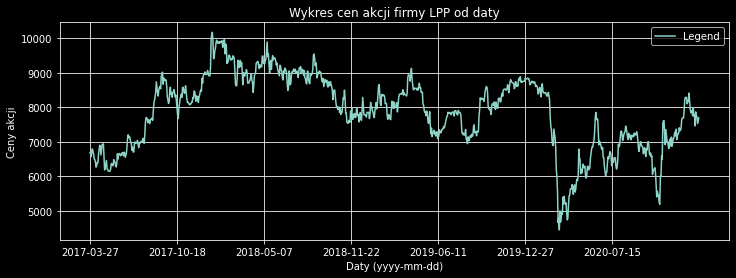

In [39]:
    plt.figure(1, figsize=(12, 4))
    plt.axes()
    plt.grid(True)
    plt.plot(Date, Close)
    plt.legend(['Legend'])
    plt.xticks(np.arange(0, len(Date), len(Date)/7))
    plt.xlabel('Daty (yyyy-mm-dd)')
    plt.ylabel('Ceny akcji')
    plt.title("Wykres cen akcji firmy LPP od daty")
    plt.show()

W kolejnym kroku dodaję nowe kolumny do naszej DataFrame odpowiednio o nagłówkach: MACD, SIGNAL i HISTOGRAM. Są to listy, ponieważ również listy zwracają funkcje `macd()`, `signal` i `histogram`, które na wejściu również dostają listy. MACD używa danych z cen akcji zamknięcia, SIGNAL wywoływany jest od MACD, jak również HISTOGRAM. Do wyliczenia średnich kroczących biorę pod uwagę cenę zamknięcia `Close`. Obecnie DataFrame plik wygląda tak:

In [40]:
    MACD = macd(Close)
    SIGNAL = signal(MACD)
    HISTOGRAM = histogram(MACD)

    plik['MACD'] = MACD
    plik['SIGNAL'] = SIGNAL
    plik['Histogram'] = HISTOGRAM
    print(plik)

            Date         Open        Close        MACD     SIGNAL  Histogram
0     2017-03-27  6453.049805  6677.549805    0.000000   0.000000   0.000000
1     2017-03-28  6650.000000  6699.000000    0.481254   0.267364  -0.213891
2     2017-03-29  6612.049805  6574.950195   -3.233563  -1.167443   2.066121
3     2017-03-30  6616.899902  6748.000000    1.404008  -0.296355  -1.700363
4     2017-03-31  6640.000000  6794.850098    5.758711   1.504890  -4.253821
...          ...          ...          ...         ...        ...        ...
996   2021-01-25  7865.000000  7750.000000  -83.404657 -17.794727  65.609930
997   2021-01-26  7750.000000  7730.000000 -100.564715 -41.177154  59.387561
998   2021-01-27  7575.000000  7530.000000 -127.154846 -65.060084  62.094762
999   2021-01-28  7680.000000  7600.000000 -134.440174 -84.956896  49.483278
1000  2021-01-29  7655.000000  7690.000000 -128.213534 -98.404622  29.808911

[1001 rows x 6 columns]


Następnie tworzę wykres: **Wskaźnik MACD**. Tak jak poprzednio używam funkcji do dodania nowej figury, dodania osi, linii siatki pomocniczej. Nakładam na siebie dwa wykresy: MACD i SIGNAL, oba od Date na osi x. Oznaczam je parametrami `label="MACD"` i `label='SIGNAL'` odpowiednio kolorem niebieskim i czerwonym. Wyświetlam legendę. Znów używam `xticks()` do poprawnego wyświetlania daty i funkcji do nadawania tytułów. Ostatecznie wyświetlam wykres.

Wykresy MACD i SIGNAL przecinają się, czym posłużymy się za moment.

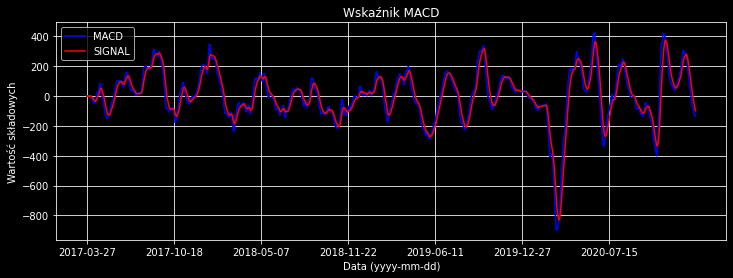

In [41]:
    plt.figure(2, figsize=(12, 4))
    plt.axes()
    plt.grid(True)
    plt.plot(Date, MACD, label="MACD", color='blue')
    plt.legend()
    plt.plot(Date, SIGNAL, label='SIGNAL', color='red')
    plt.legend()
    plt.xticks(np.arange(0, len(Date), len(Date)/7))
    plt.xlabel('Data (yyyy-mm-dd)')
    plt.ylabel('Wartość składowych')
    plt.title('Wskaźnik MACD')
    plt.show()

Patrząc na wykres można zauważyć, że wykresy MACD i SIGNAL przecinają się. Miejsca przecięć dają sygnały do potencjalnego zakupu lub sprzedaży akcji. Tworzę nowe puste listy `buy[]` i `sell[]`. Będą one przechowywały indeksy z listy `Close`. Wykonuję pętlę po długości listy `Close` od 34 indeksu, ponieważ dopiero wtedy, czyli 26 + 9 - 1, otrzymamy poprawne wyniki. MACD zaczyna przyjmować poprawne wartości od 26 indeksu, a SIGNAL wywołujemy od MACD z indeksem 9, więc sumarycznie uwzględniając indeksowanie, należy w tym wypadku użyć 34.

In [ ]:
    # przechowuje sygnały
    buy, sell = [], []
    for i in range(34, len(Close)):

Sprawdzamy miejsca, w których MACD przecina SIGNAL od dołu i czy było tak również poprzedniego dnia. Jeśli tak, to jest do sygnał do zakupu akcji. Dodajemy do listy `buy[]` indeks tego sygnału.

In [ ]:
        # przecinanie od dołu i czy było tak poprzedniego dnia
        if MACD[i] > SIGNAL[i] and MACD[i-1] < SIGNAL[i-1]:
            # i - numer wiersza, w którym spełniony jest warunek kupna
            buy.append(i)

Sprawdzamy miejsca, w których MACD przecina SIGNAL od góry i czy było tak również poprzedniego dnia. Jeśli tak, to jest do sygnał do sprzedaży akcji. Dodajemy do listy `sell[]` indeks tego sygnału.

In [ ]:
        # przecinanie od góry i czy było tak poprzedniego dnia
        elif MACD[i] < SIGNAL[i] and MACD[i-1] > SIGNAL[i-1]:
            # i - numer wiersza, w którym spełniony jest warunek sprzedaży
            sell.append(i)

Tworzę listę dat, kiedy należy kupić akcje i listę ich cen przy zamknięciu od listy indeksów`buy[]`. Dodaję wartości używając funkcji `append()` z list `Date` i `Close`.

In [ ]:
    # daty, kiedy należy kupić akcje i ich ceny
    # musimy dostać się do tego samego numeru rzędu, jaki został umieszczony
    # w liście "buy[]" jako potencjalny moment kupna
    date_to_buy, price_at_close_to_buy = [], []
    for i in buy:
        date_to_buy.append(Date[i])
        price_at_close_to_buy.append(Close[i])

Tworzę listę dat, kiedy należy sprzedać akcje i listę ich cen przy zamknięciu od listy indeksów`sell[]`. Dodaję wartości używając funkcji `append()` z list `Date` i `Close`.

In [ ]:
    # daty, kiedy należy sprzedać akcje i ich ceny
    # musimy dostać się do tego samego numeru rzędu, jaki został umieszczony
    # w liście "sell[]" jako potencjalny moment sprzedaży
    date_to_sell, price_at_close_to_sell = [], []
    for i in sell:
        date_to_sell.append(Date[i])
        price_at_close_to_sell.append(Close[i])

Następnie wyświetlam już trzeci wykres, dla trzeciej figury, z liniami siatki. Jest to jedna linia ciągła od `Date` i `Close`. Wykrest ten przypomina wykres pierwszy, ale ma dodatki - zaznaczone miejsca potencjalnego kupna i sprzedaży akcji. Dodaję te miejsca kupna i sprzedaży w miejscach przecięć MACD z SIGNAL i oznaczam jako kupno lub sprzedaż odpowiednio w zależności od tego, czy MACD było powyżej SIGNAL, czy też nie. Do wyświetlenia na osi x danych wyświetlam w kolorze zielonym znaczniki `^` jako sygnały do zakupu akcji i `v` w kolorze czerwonym jako sygnały do sprzedaży akcji. Na osi y podaję odpowiednio ceny przy momentach sugerowanego zakupu i sprzedaży. Możnaby również zamiast tworzyć i mnożyć kolejne listy skorzystać z dodanych tabel do `DataFrame plik`, do których możnaby dodać listy `buy` i `sell`, a później odwoływać się funkcją `iloc()` do konkertnego indeksu w tabeli. Jednak wybrałam listy, żeby nie powiększać obecnej DataFrame, co mogłoby być problematyczne przy wyświetleniu ogromnej liczby danych z pliku.

In [ ]:
    plt.figure(3, figsize=(12, 4))
    plt.grid(True)
    plt.plot(Date, Close, label='wykres z miejscami buy/sell')
    plt.legend()
    plt.xticks(np.arange(0, len(Date), len(Date)/7))
    plt.xlabel('Data (yyyy-mm-dd)')
    plt.ylabel('Wartość składowych')
    plt.title('Wykres z sugerowanymi miejscami kupna i sprzedaży')
    plt.scatter(date_to_buy, price_at_close_to_buy, marker="^", color='green')
    plt.scatter(date_to_sell, price_at_close_to_sell, marker="v", color='red')
    plt.show()

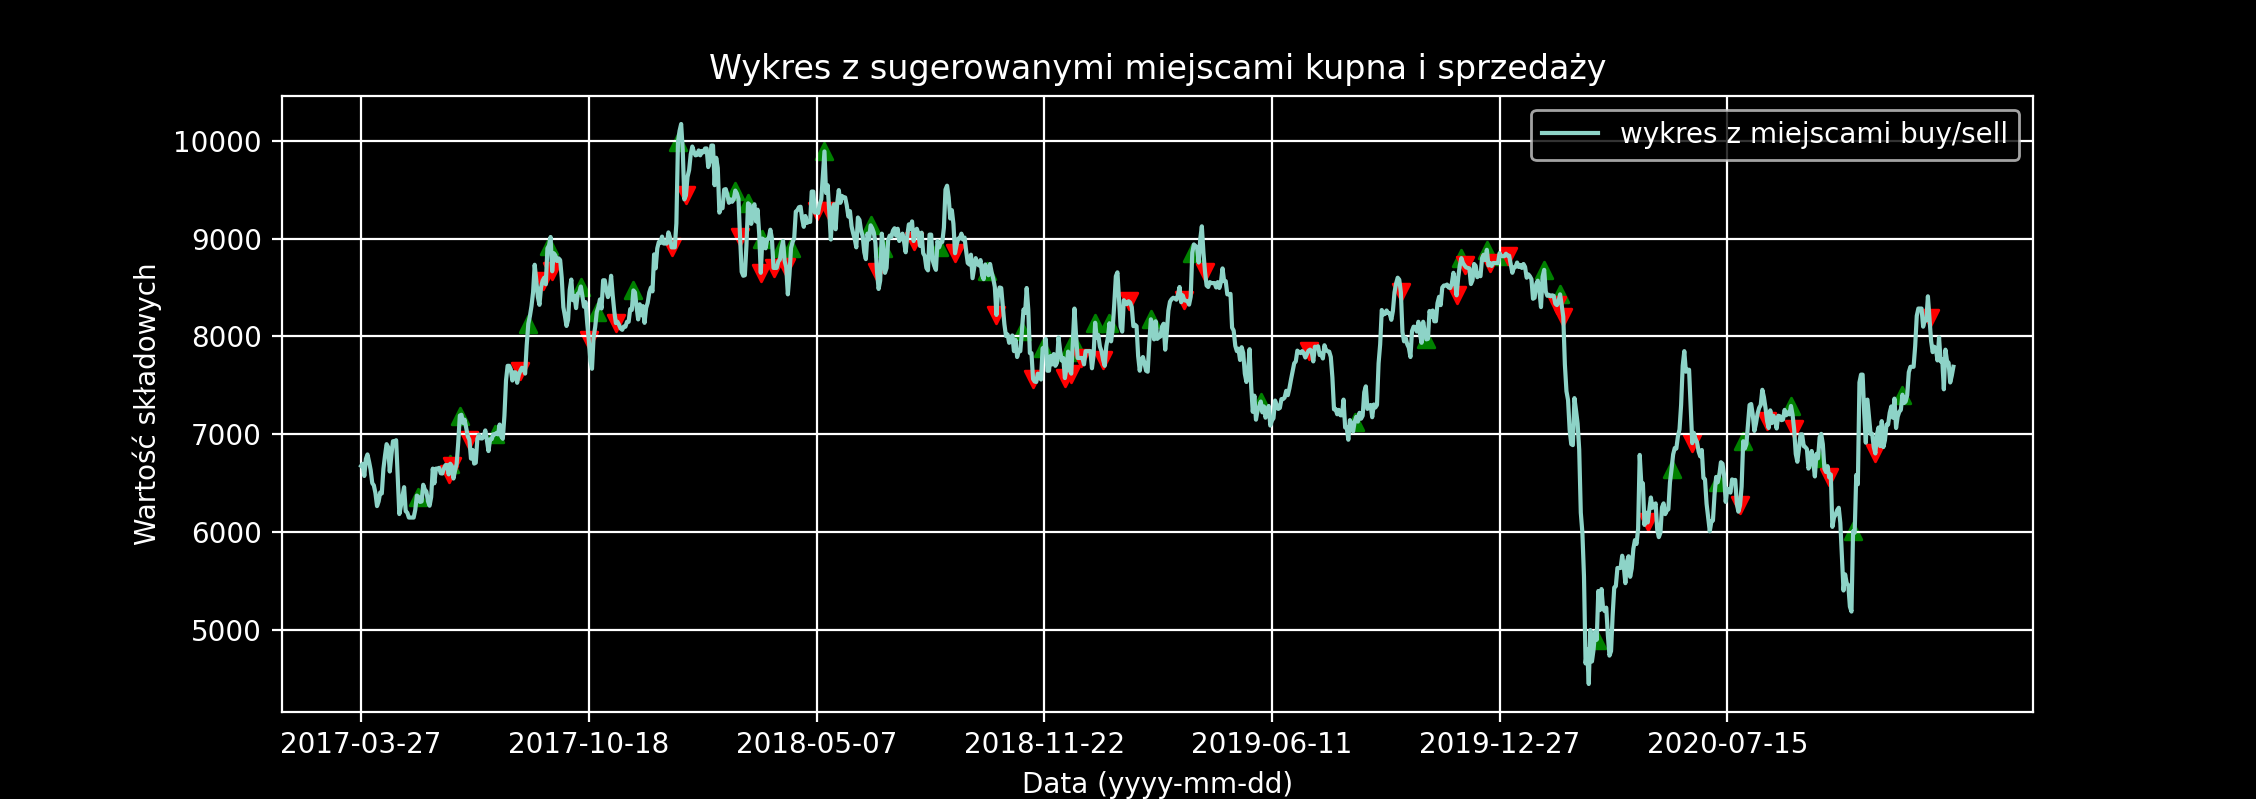

Sprawdzę teraz, czy wskaźnik MACD rzeczywiście opłaca się stosować. Dodaję `current_wallet` i `starting_wallet`, oba o wartości początkowej 1000.

In [ ]:
current_wallet, starting_wallet = 1000, 1000

Tak jak napisałam w komentarzy w kodzie, nie możemy przekalkulować zyzku, gdy pierwszym sygnałem jest sygnał sprzedaży, ponieważ nie wiemy z jakim sygnałem buy go porównać. W takim przypadku powinniśmy nie brać tej pierwszej wartości pod uwagę. Spełnia to warunek ` if sell[0] < buy[0]:`, który "popuje" pierwszy element z listy buy, czyli po prostu go wrzuca z listy sell.

In [ ]:
    # nie możemy przekalkulować zysku, gdy pierwszym sygnałem jest sygnał sprzedaży
    # ponieważ nie wiemy z jakim sygnałem buy go porównać
    # w takim przypadku powinniśmy nie brać tej pierwszej wartości pod uwagę
    if sell[0] < buy[0]:
        sell.pop(0)

Podobna sytuacja występuje dla ostatniego odebranego sygnału, czyli miejsca przecięcia się MACD i SIGNAL. Nie możemy brać takiego sygnału zakupu jako poprawny wynik. ponieważ nie wiemy, jaki byłby następny sygnał sprzedaży, dlatego również wykluczamy ten przypadek. Również popujemy element z listy, tym razem buy. Używam tutaj indeksu [-1], co oznacza iterowanie od końca listy, czyli ostatni element listy.    # ostatni odebrany sygnał przecięcia się MACD i SIGNAL to sygnał zakupu

In [ ]:
    # ostatni odebrany sygnał przecięcia się MACD i SIGNAL to sygnał zakupu
    # nie możemy jednak brać tego za dobry wynik, ponieważ nie wiemy
    # jaki byłby sygnał sprzedaży, musimy również wykluczyć ten przypadek
    elif buy[-1] > sell[-1]:
        buy.pop(-1)

Teraz przeprowadzam symulację kupowania posiadając portfel i jego stan początkowy.
Idziemy po wszystkich indeksach listy `buy`. Są to indeksy takie same, jak ceny akcji przy zamknięciu czyli lista `Close`. Iterując po liście buy, wydajemy pieniądze - odpowiednio tyle, ile wtedy kosztowały akcje. Dlatego jest znak `-=`, ponieważ od obecnego portfela odejmujemy.

In [ ]:
    for i in buy:
        # kupujemy, czyli wydajemy pieniądze, stąd "-="
        current_wallet -= Close[i]

Następnie wykonuję podobną czynność iterując po tablicy z indeksami sygnału do kupna - `sell`. Są to również indeksy takie same jak w liście `Close`, tylko teraz sprzedajemy akcje, czyli dostajemy pieniądze. Dlatego jest znak `+=`, ponieważ nasze saldo powiększa się (a przynajmniej powinno, choć ten algorytm tego nie zapewnia).

In [ ]:
    for i in sell:
        # sprzedajemy, czyli dostajemy pieniądze, stąd "+="
        current_wallet += Close[i]

Wyświetlam rezultaty jako portfel początkowy i portfel końcowy oraz ostateczny zysk. Wyświetla się jeszcze efektywność algorytmu, którą przedstawię poniżej. Niestety, ten algorytm nie okazał się być skutecznie zarabiającym. Należy wziąć pod uwagę to, że MACD ma lepsze wyniki na danych, kiedy akcje rosną i gorsze, kiedy spadają. Z tego względu jego użycie nie jest wyetarczające, aby dobrze zaplanować inwestycje i zyskać.

In [ ]:
    txt1 = "starting wallet: {}"
    print(txt1.format(starting_wallet))
    txt2 = "current wallet: {}"
    print(txt2.format(round(current_wallet, 2)))
    txt3 = "profit: {}"
    print(txt3.format(round(current_wallet - starting_wallet, 2)))
    # -86.95, tyle na minusie z zysku

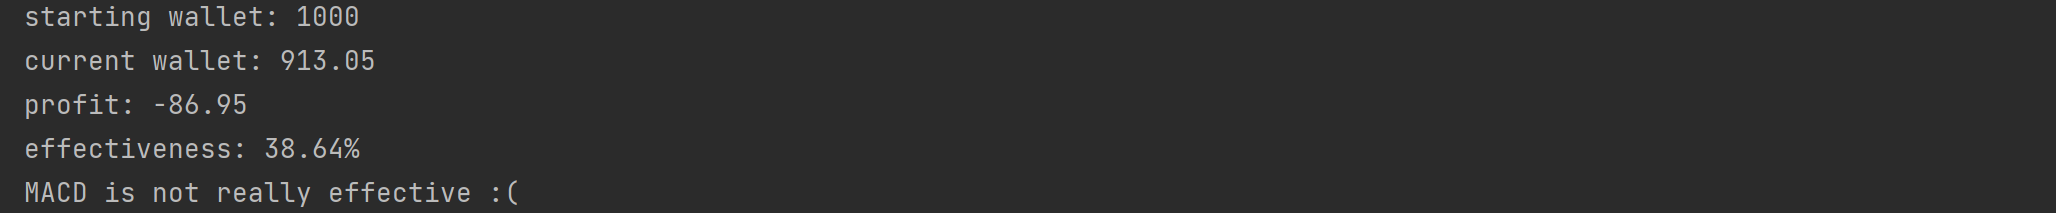

### 3. Podsumowanie i wnioski

Sprawdzę teraz jaka jest procentowa efektywność/skuteczność MACD. Początkowo inicjalizuję ją jako 0.0. Robię to w pętli od 0 do `len(buy)`. Jeśli rzeczywiście okłacało się wykonać akcję na parze indeksów `buy[i]` i `sell[i]`, to dodaj 1 do efektywności. Zwracam rezultat jako liczbę zaokrągloną funkcją `round()` do dwóch miejscach po przecinku i mnożę razy 100, żeby uzyskać wynik procentowy. Sumarycznie wyświetlam efektywność używając funkcji `format()`, której używa się do łączenia stringu z liczbą i wyświetleniu obu.

In [ ]:
    # sprawdźmy, jaka rzeczywiście jest wtedy skuteczność MACD
    effectiveness = 0.0
    for i in range(0, len(buy)):
        if Close[buy[i]] < Close[sell[i]]:
            effectiveness += 1
    result = round(effectiveness/len(buy)*100, 2)
    summary = "effectiveness: {}%"
    print(summary.format(result))

I końcowo, jeśli resultat procentowy jest większy od 50%, czyli nie powinno być strat, to MACD jest efektywny. Niestety, ten algorytm nie jest efektywny do inwestycji długoterminowych, gdyż sprawdziłam to na różnych danych. Jego efektywność jest poniżej 50%, więc nie polecałabym sugerowania się tym wskaźnikiem, ponieważ reaguje on z opóźnieniem na otrzynane dane. Lepiej byłoby zaimplementować jeszcze RSI i histogram, żeby przewidzieć momenty przecięcia się MACD i SIGNAL, a nie dopiero w momencie, kiedy to się stanie. Zwiększylibyśmy wtedy zyski. Taka opóźniona reakcja może sporo kosztować. Na danych firmy LPP SA wyszła mi efektywność 38.64%, co nie jest dobrym wynikiem. Jednak poza tym, wskaźnik MACD jest przydatny w analizie technicznej i wyznaczania linii trendu.

In [ ]:
    if result > 50.0:
        print("MACD is effective!")
    else:
        print("MACD is not really effective :(")
    # 38.64%, taki procent par daje dobry wynik
    print(plik)

Poniżej zamieszczę wykresy i wyniki dla różnych danych.

### CCC S.A. (CCC.WA)

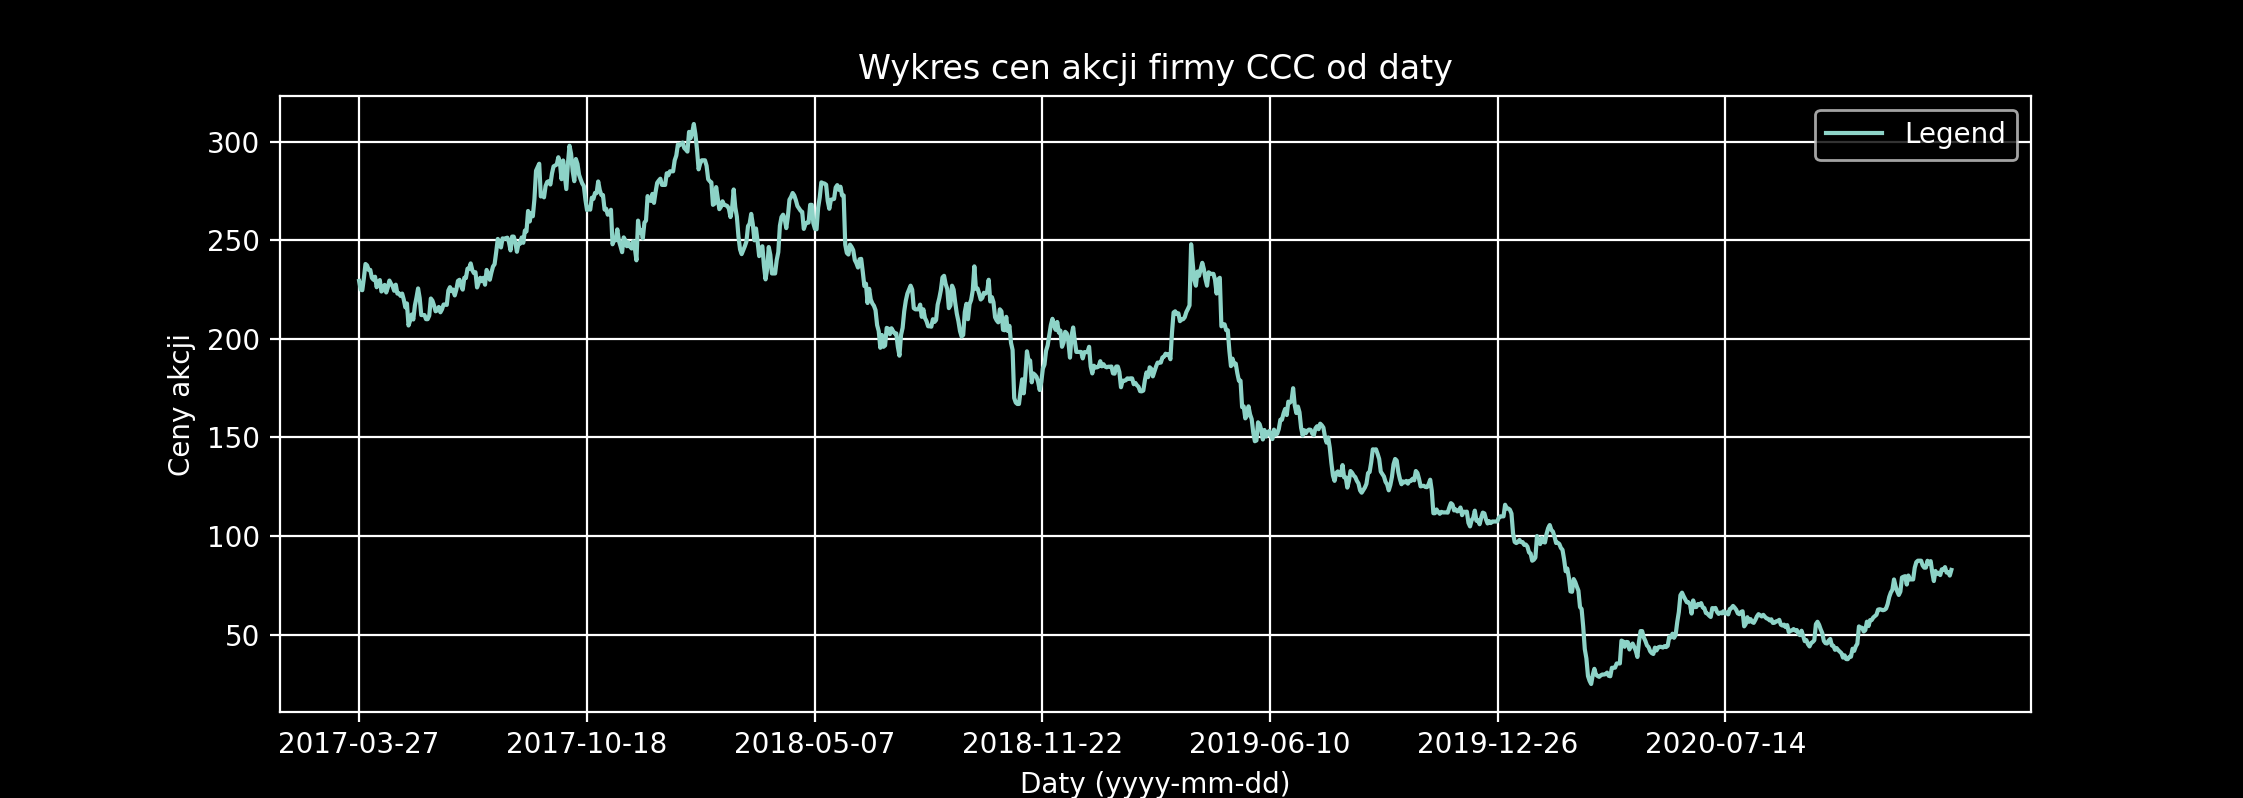
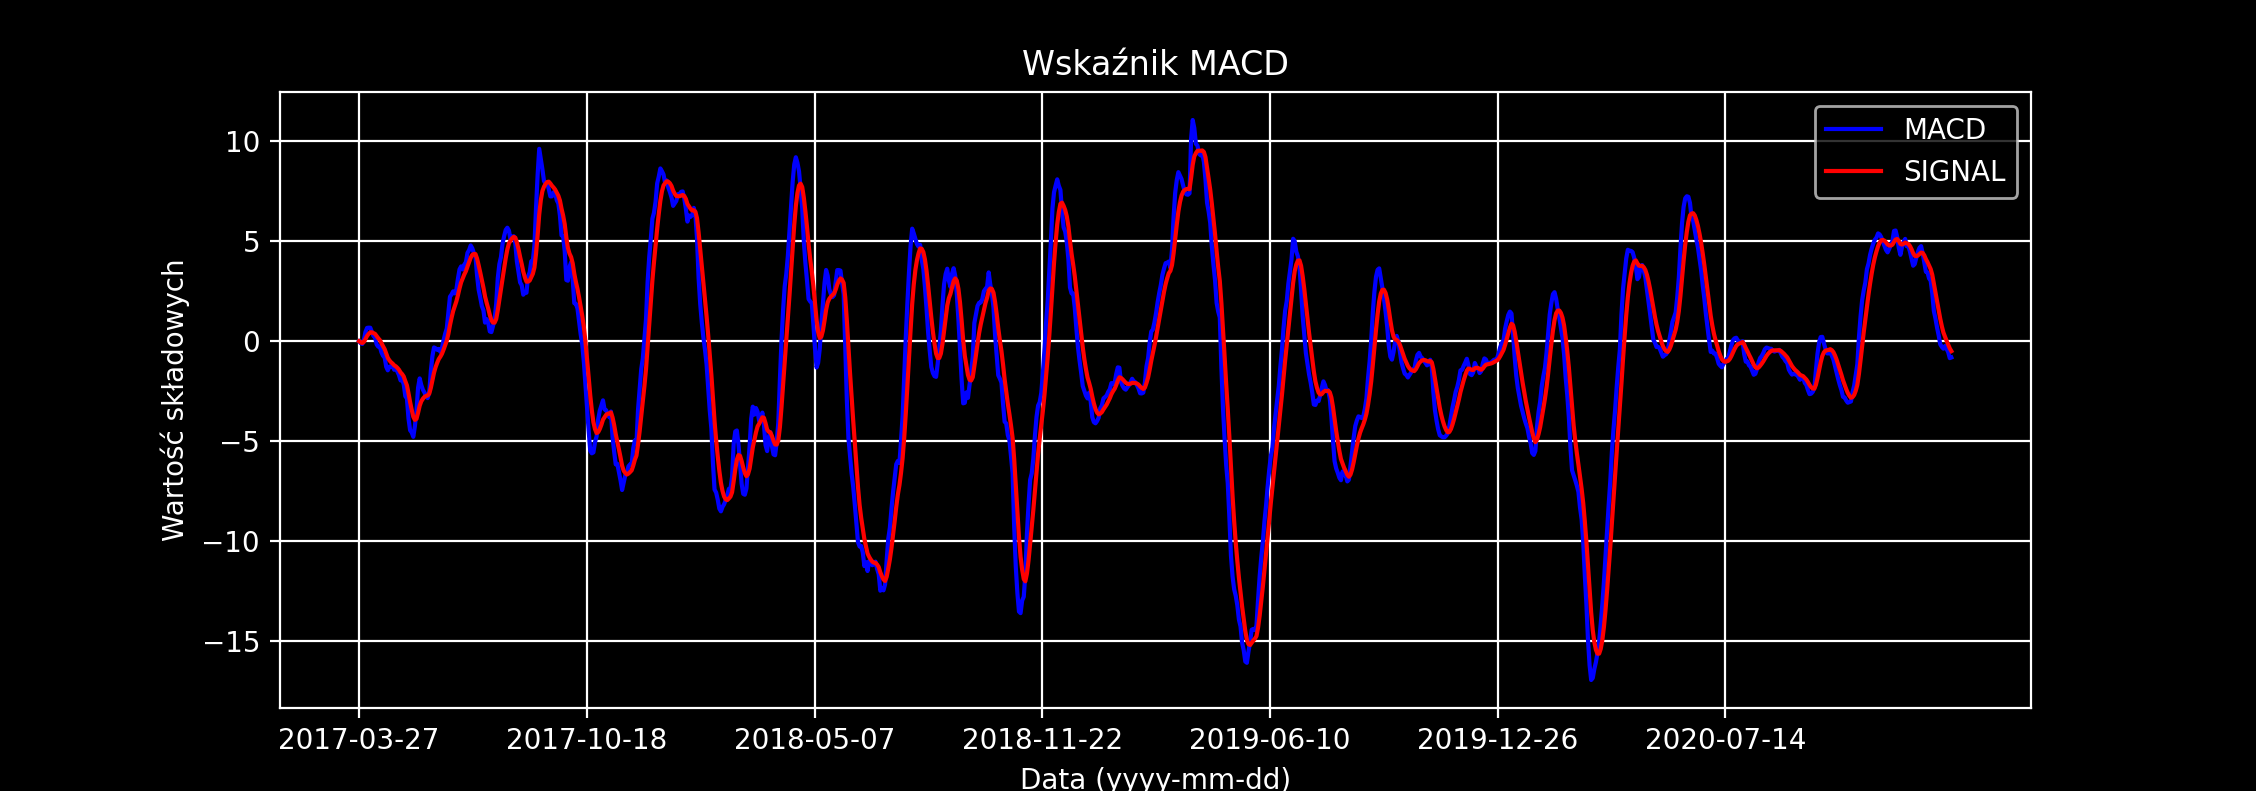
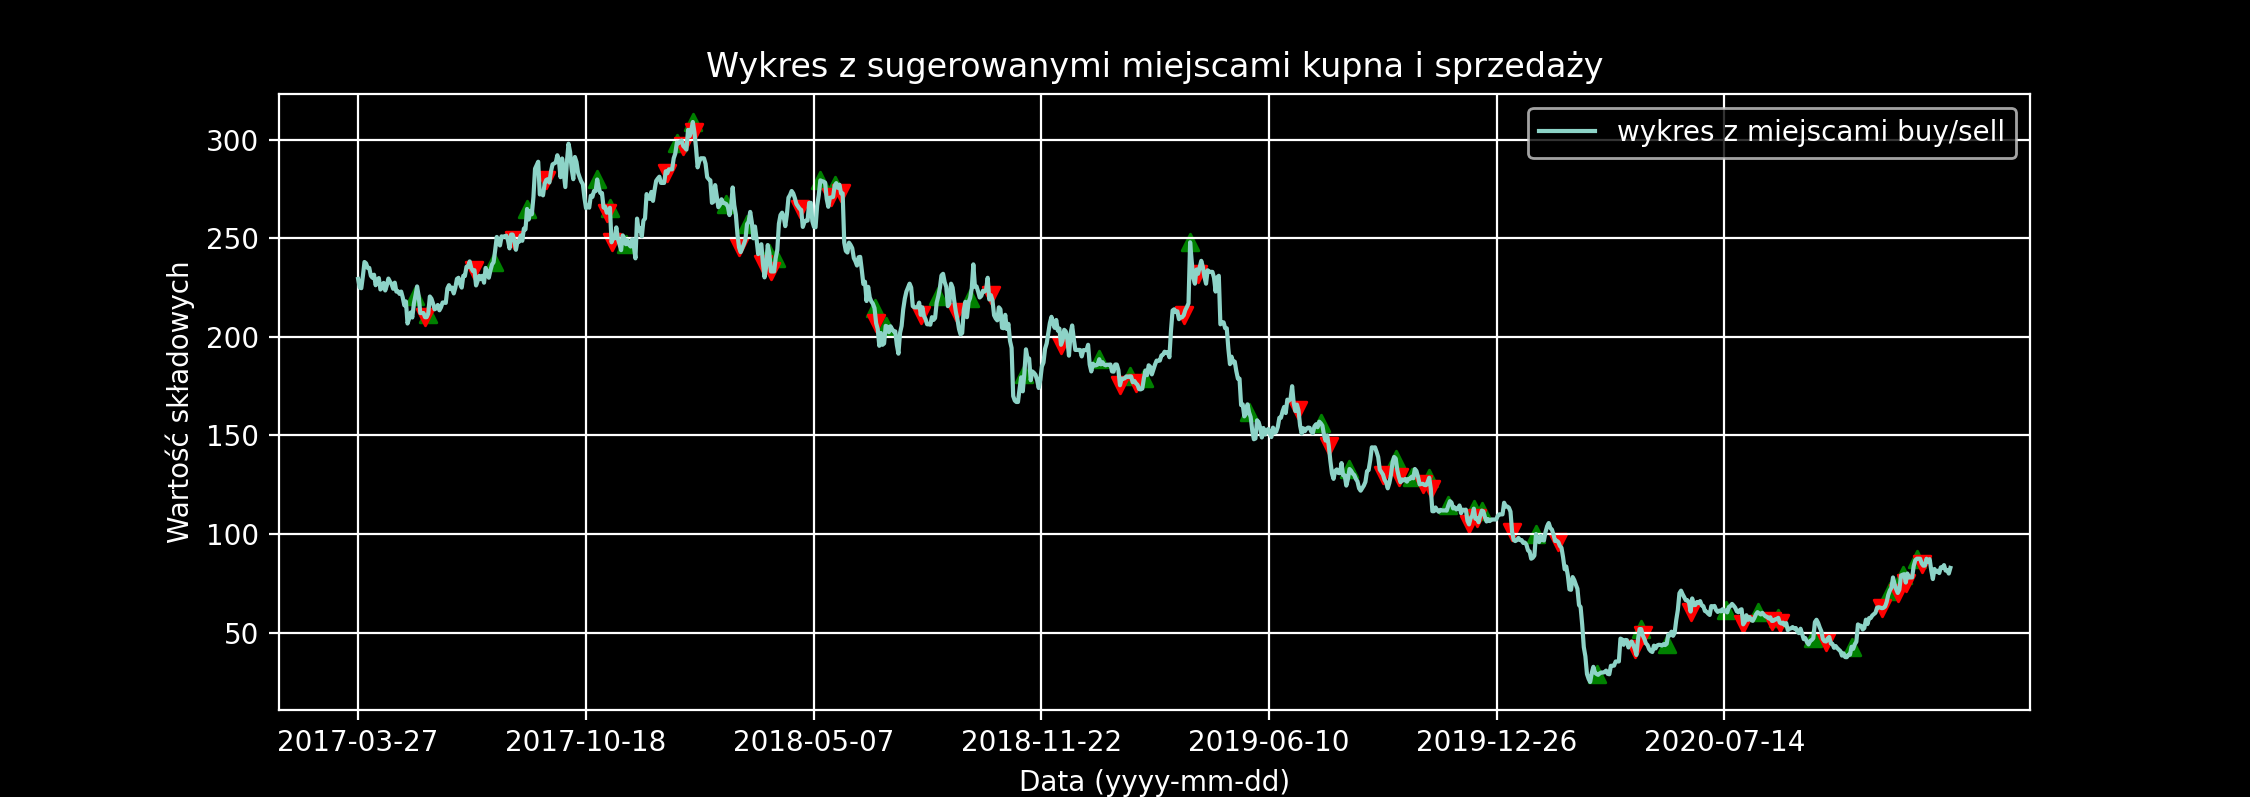
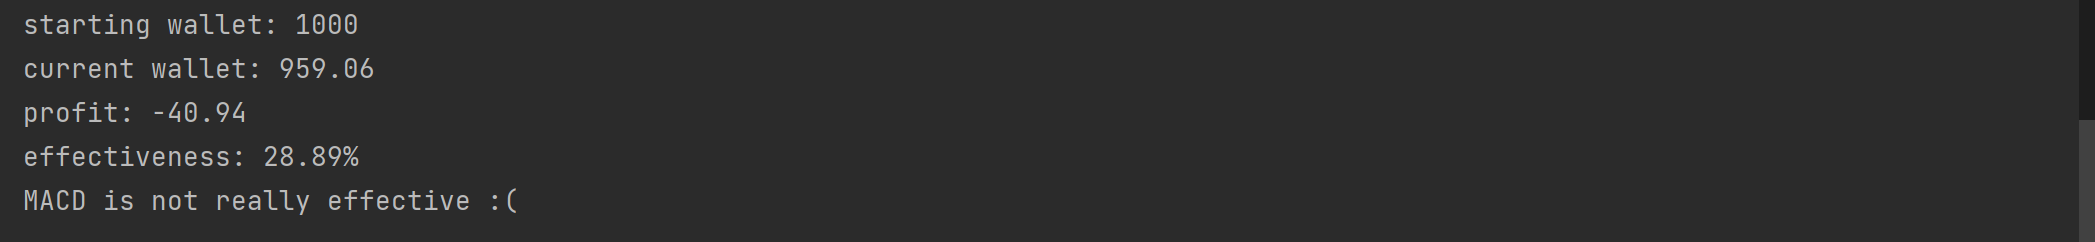

Jak widać na pierwszym wykresie danych akcji firmy CCC, ich akcje traciły na wartości. Również wskaźnik MACD wtedy traci i jego efektywność maleje.

### Grupa LOTOS S.A. (LTS.WA)

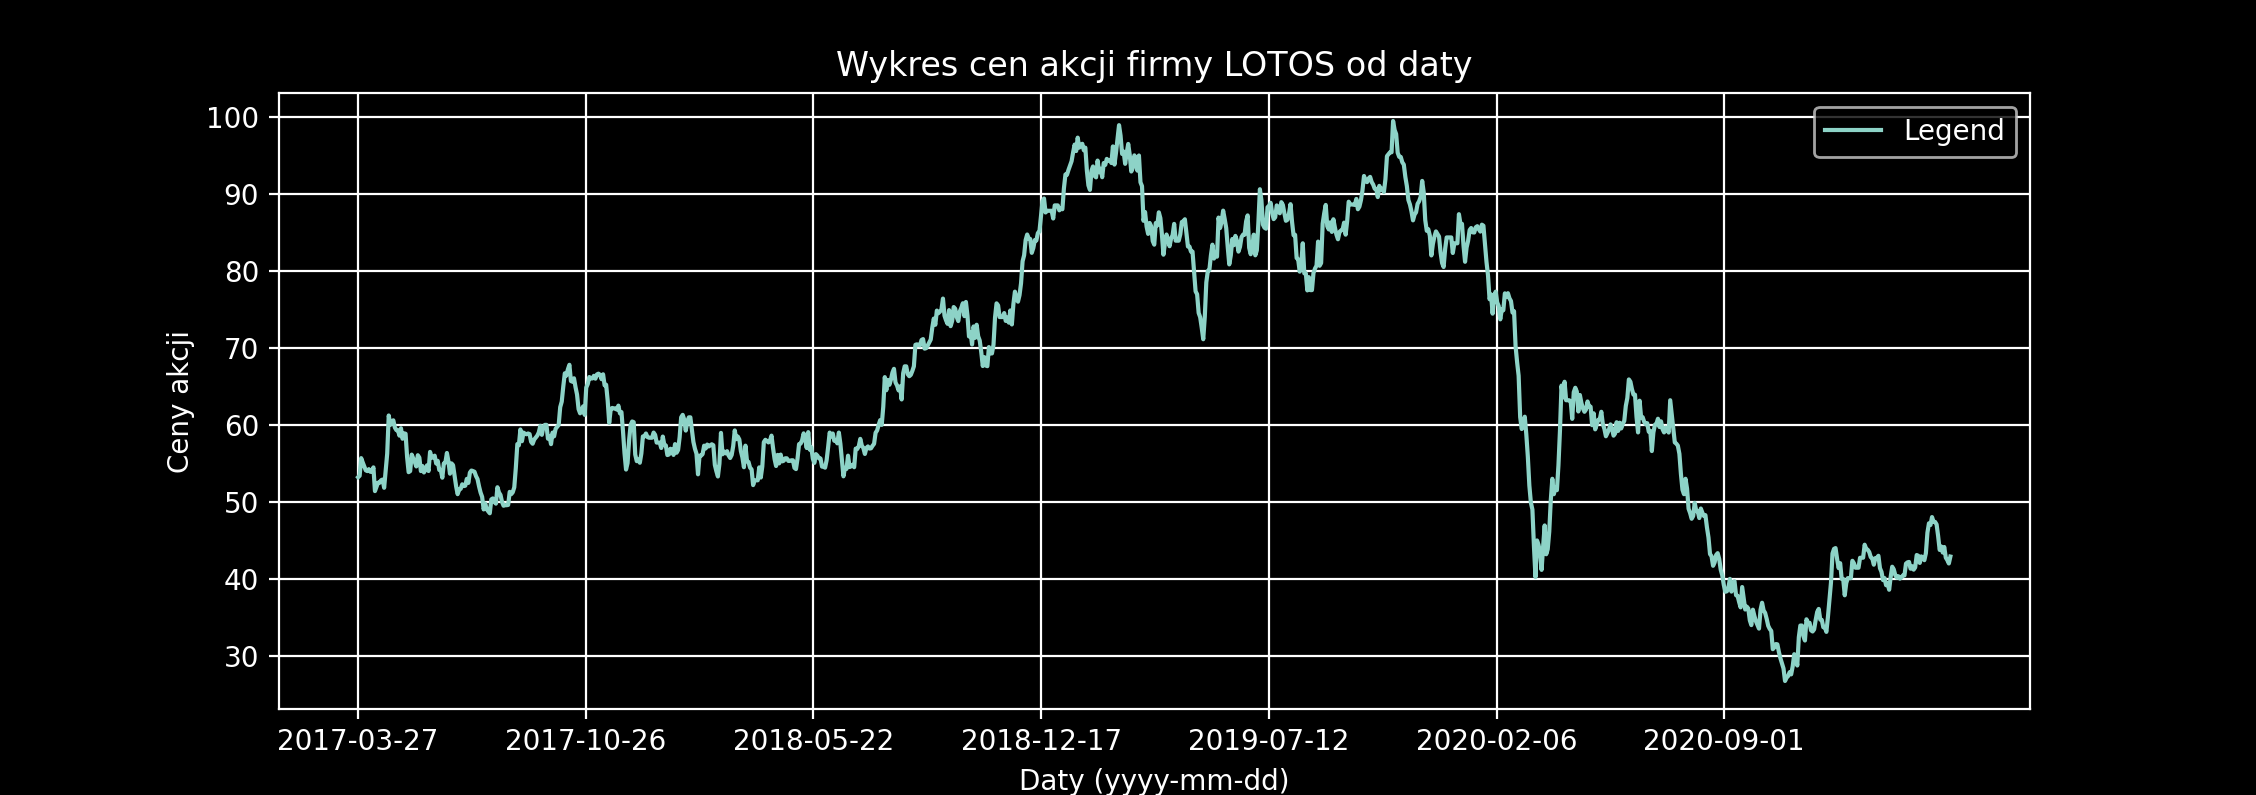
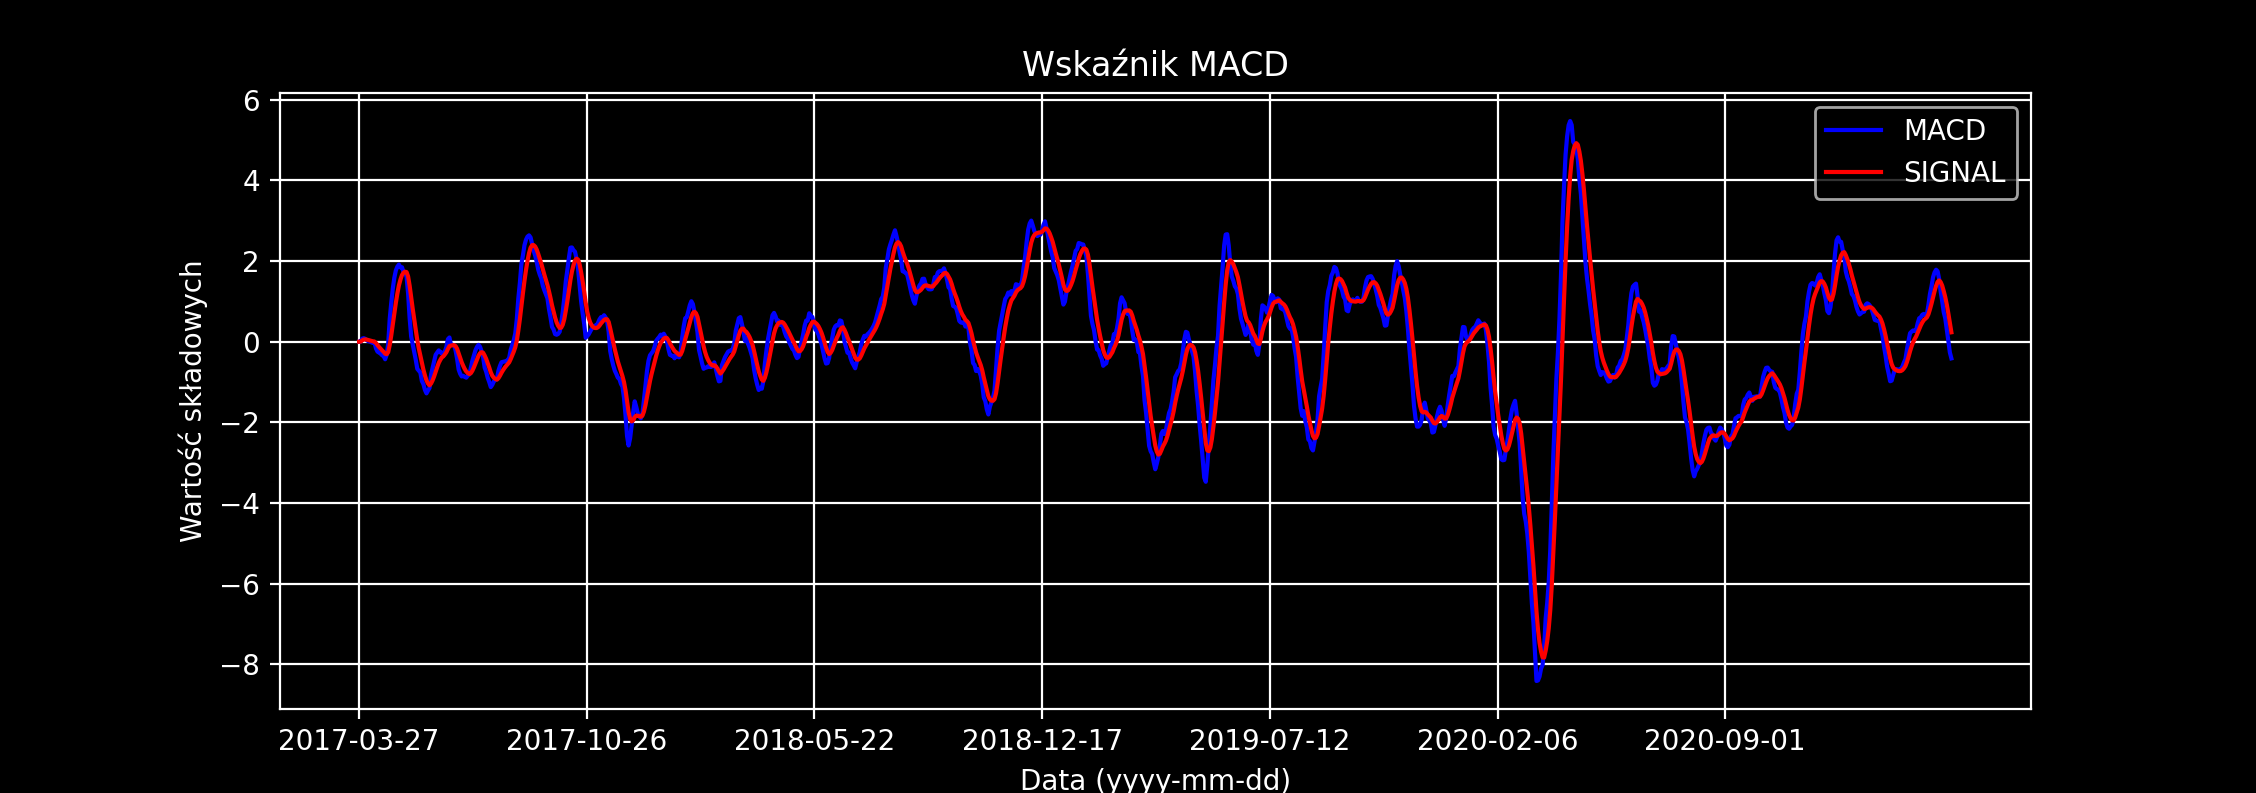
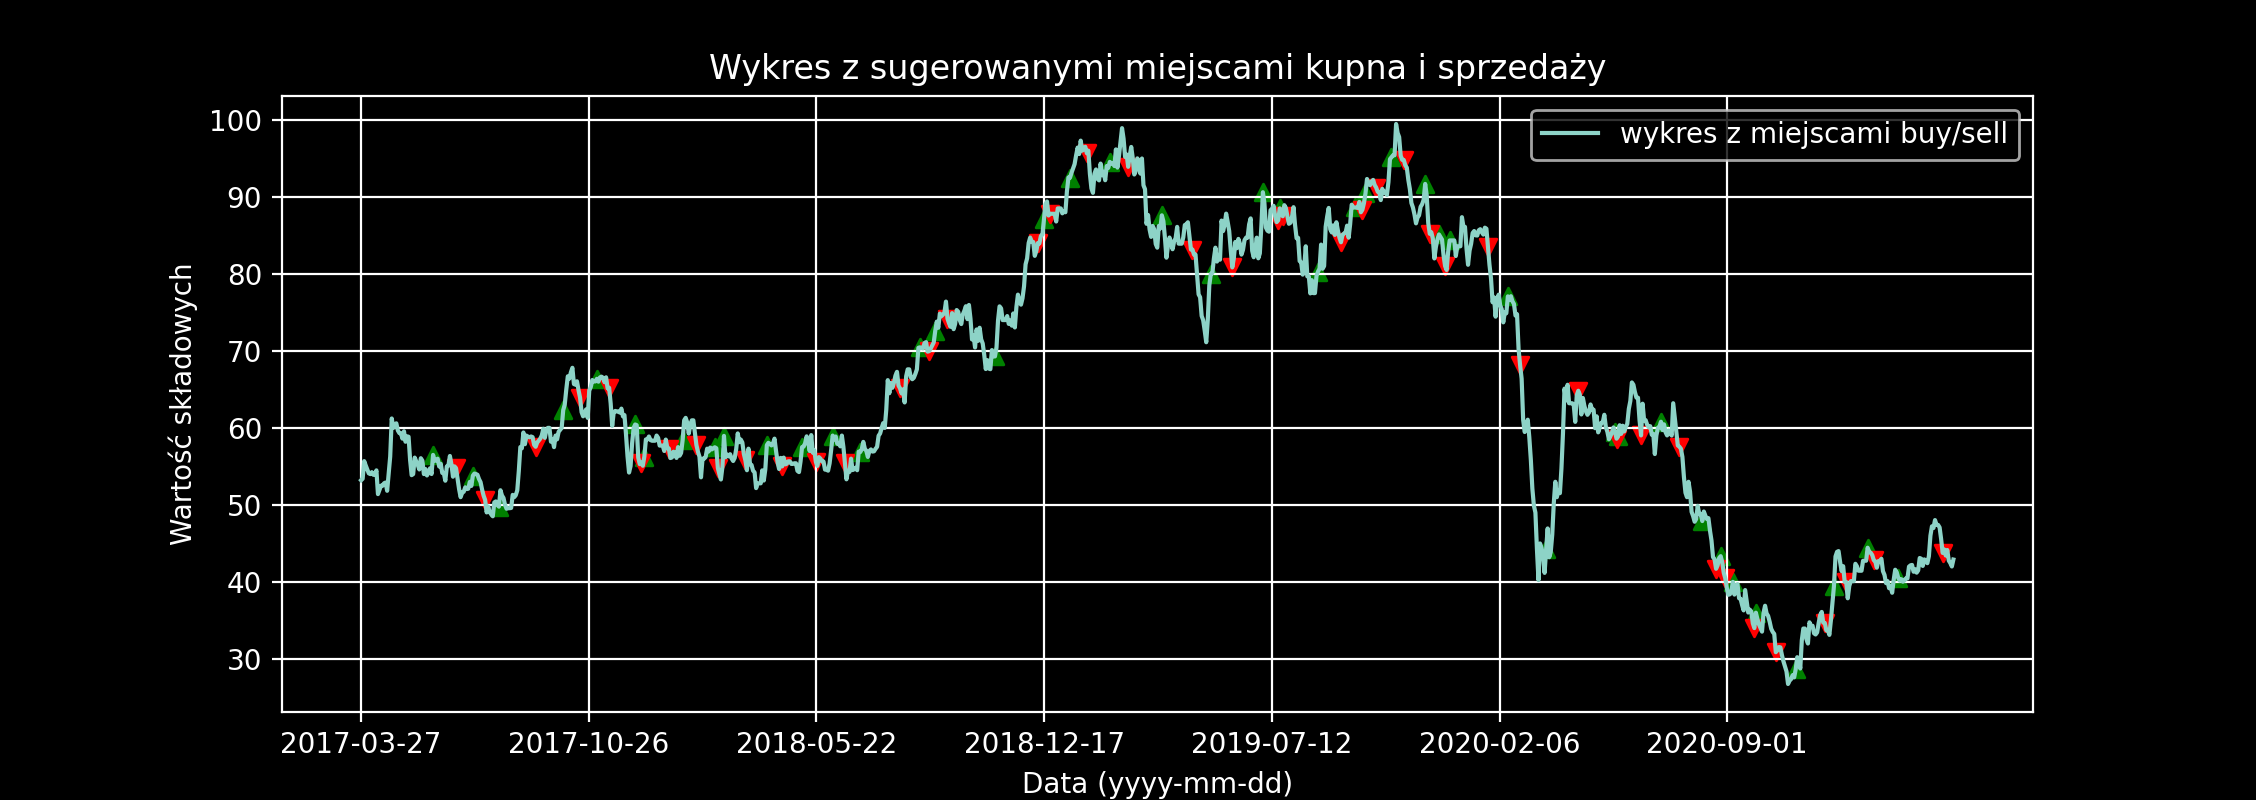
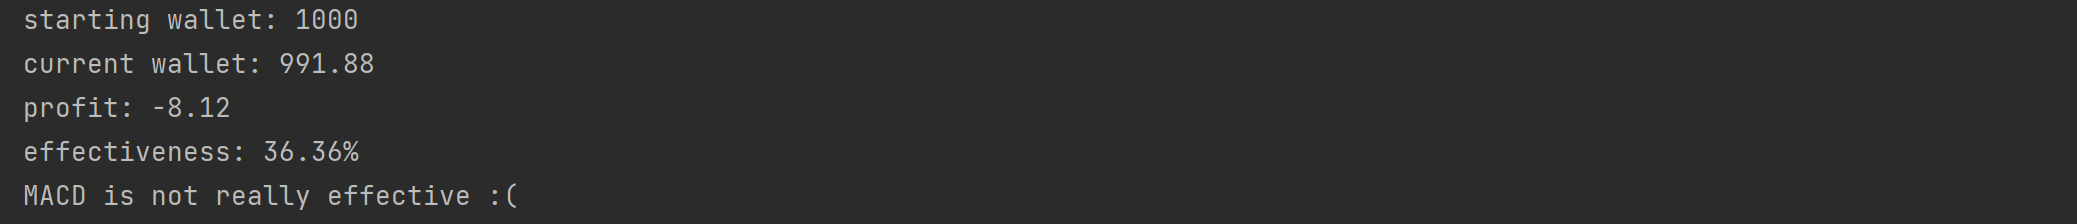

Dotatkowe wnoiski, jakie można wyciągnąć z powyższych wykresów są takie, że pandemia odcisnęła swoje piętno również na giełdzie - można zaobserwować widoczne spadki cen akcji na początku 2020 roku. Bardzo dobrze wizualizuje to wykrez cen akcji firmy LOTOS, która od 2017 do 2019 roku systematycznie umacniała się na giełdzie, a jej akcje były coraz bardziej wartościowe.